In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('/content/covid19_Confirmed_dataset.csv')
dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [6]:
dataset.shape

(266, 104)

In [7]:
df = dataset.drop(['Lat','Long'],axis=1)
df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [9]:
corona_dataset_agg = df.groupby('Country/Region').sum()
corona_dataset_agg.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [10]:
corona_dataset_agg.shape

(187, 101)

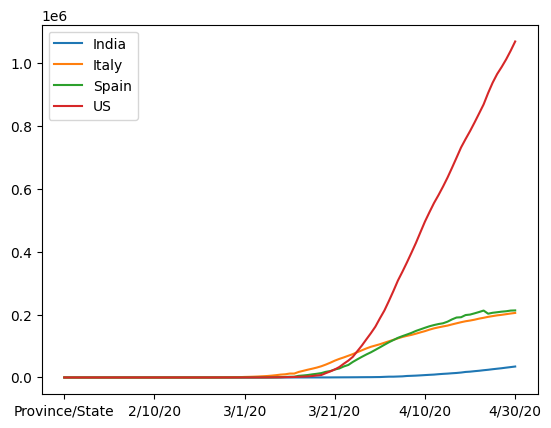

In [20]:
corona_dataset_agg.loc['India'].plot()
corona_dataset_agg.loc['Italy'].plot()
corona_dataset_agg.loc['Spain'].plot()
corona_dataset_agg.loc['US'].plot()
plt.legend()

<Axes: >

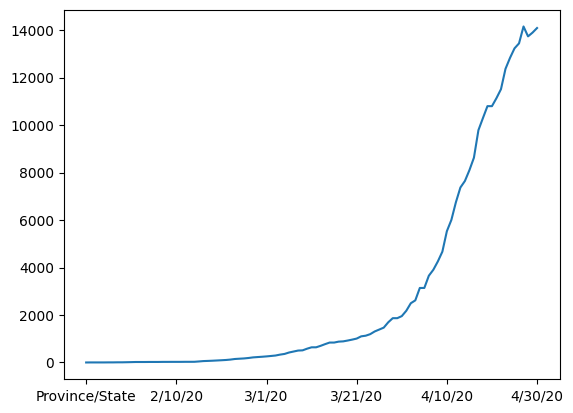

In [40]:
corona_dataset_agg.loc['Japan'].plot()

<Axes: >

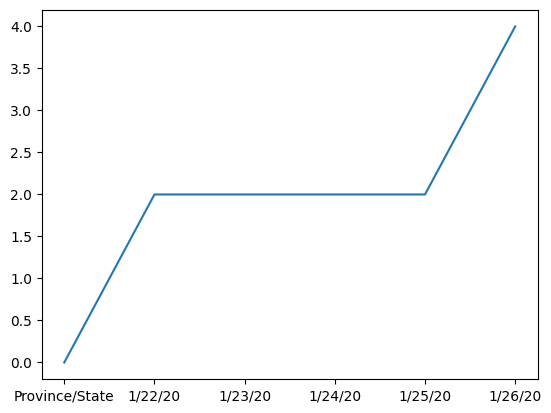

In [42]:
corona_dataset_agg.loc['Japan'][: 6].plot()

<Axes: >

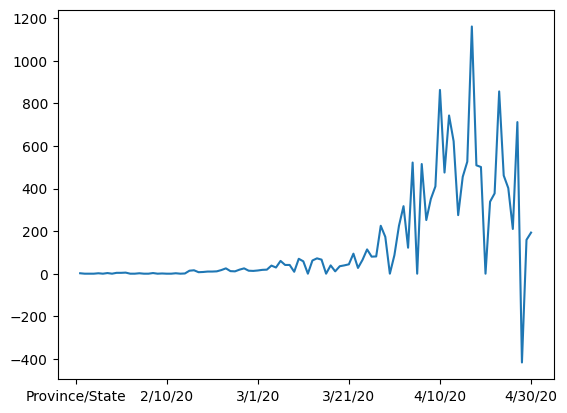

In [48]:
corona_dataset_agg.loc['Japan'].diff().plot()

In [49]:
corona_dataset_agg.loc['Japan'].diff().max()

np.int64(1161)

In [51]:
corona_dataset_agg.loc['India'].diff().max()

np.int64(1893)

In [66]:
print(corona_dataset_agg.dtypes)


Province/State    object
1/22/20            int64
1/23/20            int64
1/24/20            int64
1/25/20            int64
                   ...  
4/26/20            int64
4/27/20            int64
4/28/20            int64
4/29/20            int64
4/30/20            int64
Length: 101, dtype: object


In [67]:
corona_dataset_agg = corona_dataset_agg.apply(pd.to_numeric, errors='coerce')


In [69]:
print(corona_dataset_agg.loc[country])
print(corona_dataset_agg.loc[country].dtype)


Province/State       NaN
1/22/20              0.0
1/23/20              0.0
1/24/20              0.0
1/25/20              0.0
                   ...  
4/26/20           6714.0
4/27/20           6721.0
4/28/20           6744.0
4/29/20           6752.0
4/30/20           6766.0
Name: Australia, Length: 101, dtype: float64
float64


In [70]:
print(country in corona_dataset_agg.index)  # Should return True


True


In [71]:
max_infection = []

for country in contries:
    if country in corona_dataset_agg.index:
        # Convert to numeric to avoid errors
        numeric_data = pd.to_numeric(corona_dataset_agg.loc[country], errors='coerce')
        max_infection.append(numeric_data.diff().max())
    else:
        print(f"Warning: {country} not found in dataset")

corona_dataset_agg["max_infection"] = max_infection


In [72]:
corona_dataset_agg

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0.0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0.0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0.0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0.0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0.0,0,0,0,0,0,0,0,0,0,...,474,480,484,342,342,342,343,344,344,66.0
Western Sahara,0.0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,4.0
Yemen,0.0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,6,6,5.0


In [74]:
corona_data = pd.DataFrame(corona_dataset_agg["max_infection"])
corona_data.head()

,max_infection
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [77]:
happiness_dataset = pd.read_csv('/content/worldwide_happiness_report.csv')
happiness_dataset.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [78]:
useless_col = ['Overall rank','Score','Generosity','Perceptions of corruption']
happiness_dataset = happiness_dataset.drop(useless_col,axis=1)
happiness_dataset.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [79]:
happiness_dataset.set_index('Country or region',inplace=True)
happiness_dataset.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [80]:
happiness_dataset.shape

(156, 4)

In [81]:
corona_data.shape

(187, 1)

In [83]:
data = corona_data.join(happiness_dataset,how='inner')
data.head()

,max_infection,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


In [84]:
data.corr()

,max_infection,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


In [85]:
data

,max_infection,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,29.0,0.960,1.427,0.805,0.154
Vietnam,19.0,0.741,1.346,0.851,0.543
Yemen,5.0,0.287,1.163,0.463,0.143
Zambia,9.0,0.578,1.058,0.426,0.431


<Axes: xlabel='GDP per capita', ylabel='max_infection'>

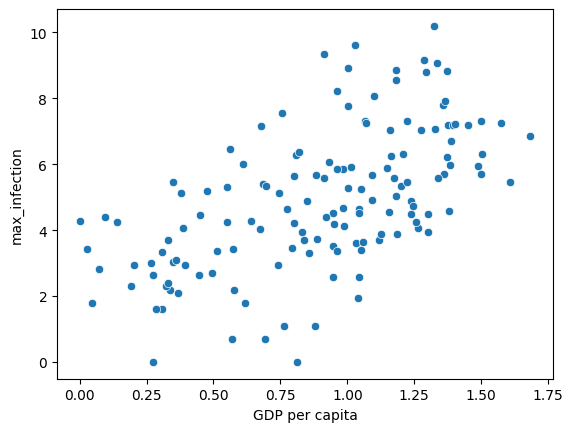

In [91]:
x = data["GDP per capita"]
y = data["max_infection"]
sns.scatterplot(x=x,y=np.log(y))

<Axes: xlabel='GDP per capita', ylabel='max_infection'>

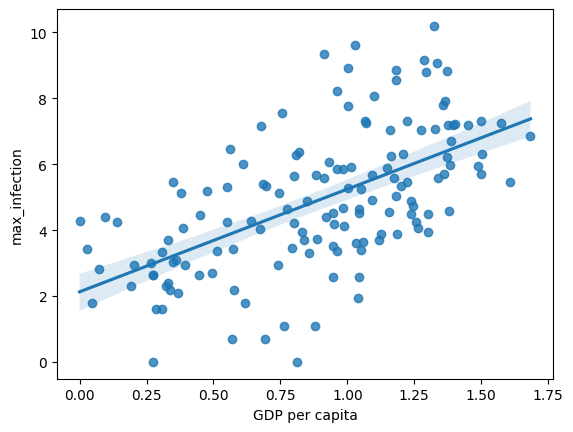

In [92]:
sns.regplot(x=x,y=np.log(y))

<Axes: xlabel='Social support', ylabel='max_infection'>

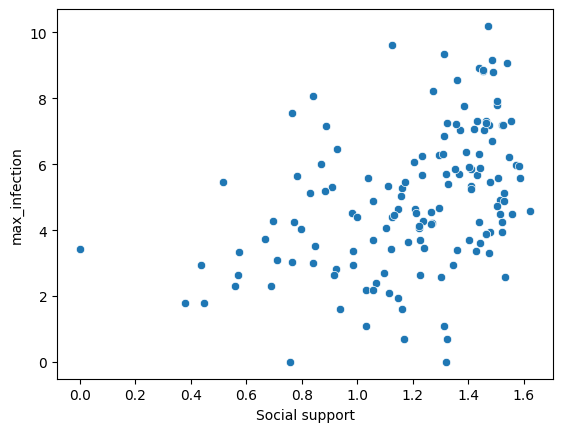

In [93]:
x = data["Social support"]
y = data["max_infection"]
sns.scatterplot(x=x,y=np.log(y))

<Axes: xlabel='Social support', ylabel='max_infection'>

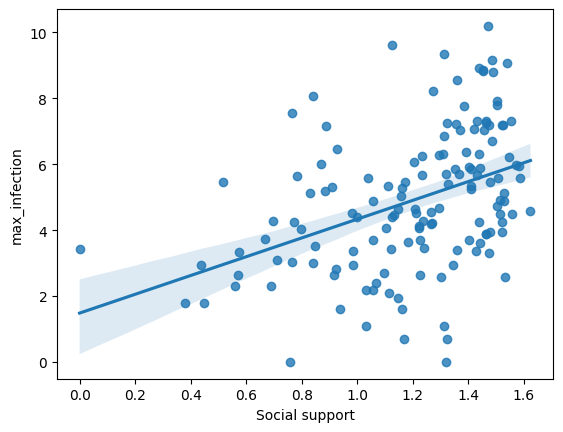

In [94]:
sns.regplot(x=x,y=np.log(y))

<Axes: xlabel='Healthy life expectancy', ylabel='max_infection'>

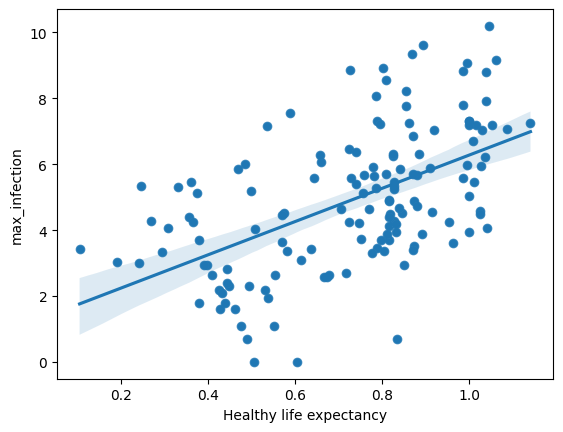

In [95]:
x = data["Healthy life expectancy"]
y = data["max_infection"]
sns.scatterplot(x=x,y=np.log(y))
sns.regplot(x=x,y=np.log(y))

<Axes: xlabel='Freedom to make life choices', ylabel='max_infection'>

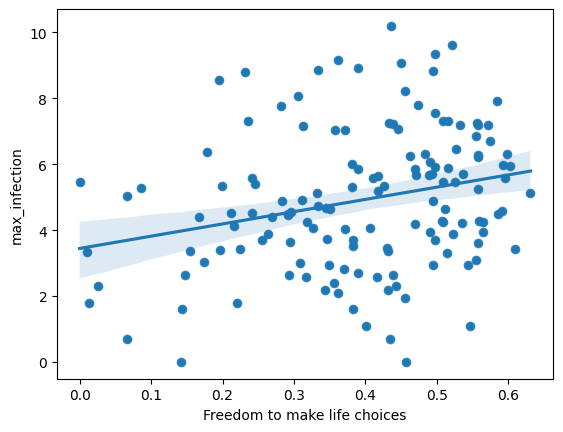

In [96]:
x = data["Freedom to make life choices"]
y = data["max_infection"]
sns.scatterplot(x=x,y=np.log(y))
sns.regplot(x=x,y=np.log(y))